In [2]:
import numpy as np

# Load the 4 npy files
npy_files = ["all_sims_data_batch_0.npy", "all_sims_data_batch_1.npy", "all_sims_data_batch_2.npy", "all_sims_data_batch_3.npy", "all_sims_data_batch_4.npy", "all_sims_data_batch_5.npy", "all_sims_data_batch_6.npy", "all_sims_data_batch_7.npy", "all_sims_data_batch_8.npy", "all_sims_data_batch_9.npy", "all_sims_data_batch_10.npy", "all_sims_data_batch_11.npy", "all_sims_data_batch_12.npy"]  # Replace with actual filenames
arrays = [np.load(f) for f in npy_files]

# Concatenate along the first axis
final_array = np.concatenate(arrays, axis=0)  # Shape: (512, 20, 128, 128, 5)

# Save the concatenated array
np.save("reshaped_data.npy", final_array)


In [3]:
import json

# List of JSON files
json_files = [
    "sim_data_batch_0.json",
    "sim_data_batch_1.json",
    "sim_data_batch_2.json",
    "sim_data_batch_3.json",
    "sim_data_batch_4.json",
    "sim_data_batch_4.json",
    "sim_data_batch_5.json",
    "sim_data_batch_6.json",
    "sim_data_batch_7.json",
    "sim_data_batch_8.json",
    "sim_data_batch_9.json",
    "sim_data_batch_10.json",
    "sim_data_batch_11.json",
    "sim_data_batch_12.json"
]
hole_location_file = "Hole_Location_384.json"  # Special handling for this file

json_data = []

# Read and merge the first five JSON files
for f in json_files:
    with open(f, "r") as file:
        json_data.extend(json.load(file))  # Extend list to concatenate

# # Read the last JSON file and take only the last 384 entries
# with open(hole_location_file, "r") as file:
#     hole_location_data = json.load(file)[-384:]  # Take last 384 entries

# # Merge hole location data
# json_data.extend(hole_location_data)

# Save the merged JSON file
with open("merged_data.json", "w") as out_file:
    json.dump(json_data, out_file, indent=4)

print(f"Final merged JSON contains {len(json_data)} entries.")  # Debugging step


Final merged JSON contains 1792 entries.


In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
def plot_with_hole_white(
    trajectory, 
    channel_names=["ρ", "Ux", "Uy", "P", "mask"], 
    tol=1e-8
):
    """
    Plot each timestep of a trajectory such that any values whose absolute value
    is below a given tolerance are displayed as white (masked),
    while nonzero data use a normal colormap.

    Args:
        trajectory (np.ndarray): Array of shape (timesteps, height, width, channels).
        channel_names (list): Names for the channels.
        tol (float): Tolerance below which values are masked (shown as white).
    """
    # Create a copy of the viridis colormap
    cmap = matplotlib.cm.get_cmap('viridis').copy()
    # Masked values (those < tol in absolute value) will be plotted as white
    cmap.set_bad(color='white')

    n_timesteps = trajectory.shape[0]
    for t in range(n_timesteps):
        data = trajectory[t]  # shape: (height, width, channels)
        n_channels = data.shape[-1]
        
        fig, axes = plt.subplots(1, n_channels, figsize=(4*n_channels, 4))
        
        for ch in range(n_channels):
            # Mask out values whose absolute value is below 'tol'
            masked_channel = np.ma.masked_where(
                np.abs(data[:, :, ch]) < tol,
                data[:, :, ch]
            )
            
            # If you prefer colorbars to scale based on only the unmasked region:
            valid_vals = data[:, :, ch][np.abs(data[:, :, ch]) >= tol]
            if valid_vals.size > 0:
                vmin, vmax = valid_vals.min(), valid_vals.max()
            else:
                # If everything is below tol (i.e., fully masked), pick a small range
                vmin, vmax = 0, 1
            
            im = axes[ch].imshow(masked_channel, cmap=cmap, vmin=vmin, vmax=vmax)
            axes[ch].set_title(f"{channel_names[ch]} | Timestep {t}")
            axes[ch].axis("off")
            fig.colorbar(im, ax=axes[ch], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)

/tmp/ipykernel_2606710/437628178.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('viridis').copy()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

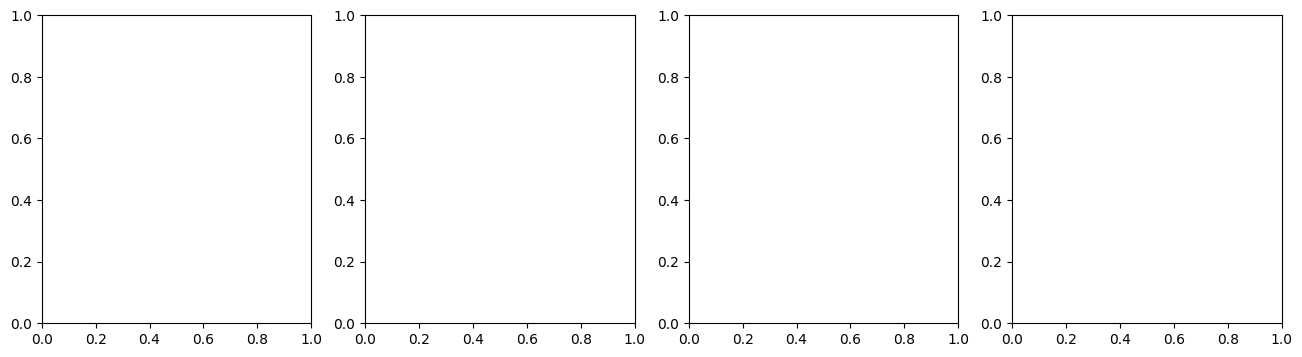

In [6]:
combined_data = np.load("/data/user_data/vhsingh/FPO_cylinder_hole_location/2results_batch_1.npy")
sample_trajectory = combined_data[0]  # shape: (20,128,128,5)
# sample_timestep = 0
# plot_reshaped_sample(sample_trajectory, sample_timestep, output_folder)
plot_with_hole_white(
sample_trajectory, 
channel_names=["Ux", "Uy", "P", "Re", "mask", "sdf"], 
tol=1e-8
)

In [3]:
def save_grid_to_file(grid, filename):
    """
    Saves the grid values to a text file in a readable format.
    Each row corresponds to a row in the grid, making it easy to verify values.
    """
    df = pd.DataFrame(grid)
    df.to_csv(filename, sep='\t', header=False, index=False)
    print(f"Saved grid values to {filename}")

# For testing the SDF and mask extraction:
def test_sdf_and_mask_extraction():
    # Load data from the testing file (assumes output has shape (..., 128, 128, 9))
    data = np.load("testingsdf.npy")
    
    # According to our new ordering:
    # SDF is in channel 6 and geometry mask is in channel 5.
    sdf_sample = data[0, 0, :, :, 6]         # first trajectory, first timestep, SDF values
    geometry_mask_sample = data[0, 0, :, :, 5] # first trajectory, first timestep, mask values
    
    # Save extracted grids to files.
    save_grid_to_file(sdf_sample, "sdf_values_from_testingsdf.txt")
    save_grid_to_file(geometry_mask_sample, "geometry_mask_from_testingsdf.txt")

In [6]:
import os
import pandas as pd
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)
save_grid_to_file(combined_data[0, 0, :, :, 6], os.path.join(output_folder, "sdf.txt"))
save_grid_to_file(combined_data[0, 0, :, :, 5], os.path.join(output_folder, "mask.txt"))

Saved grid values to output/sdf.txt
Saved grid values to output/mask.txt
